## Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

## Load the data
Notes:
- x_train and x_test contain images of 10 different types of objects
- y_train and y_test contain an id for the corresponding object.
- For example: x_train[1] contains an image of a truck and y_train[1] contains the number 9 which is the id of the truck class.
- Here are the types of the objects that we have along with their id: [('airplane',0), ('automobile',1), ('bird',2), ('cat',3), ('deer',4), ('dog',5), ('frog',6), ('horse',7), ('ship',8), ('truck',9)]

In [2]:
data = keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = data.load_data()

## Task 1 - Explore the data
Notes:
- See what the data looks like
- Visualize one of the images using matplotlib

<IPython.core.display.Javascript object>


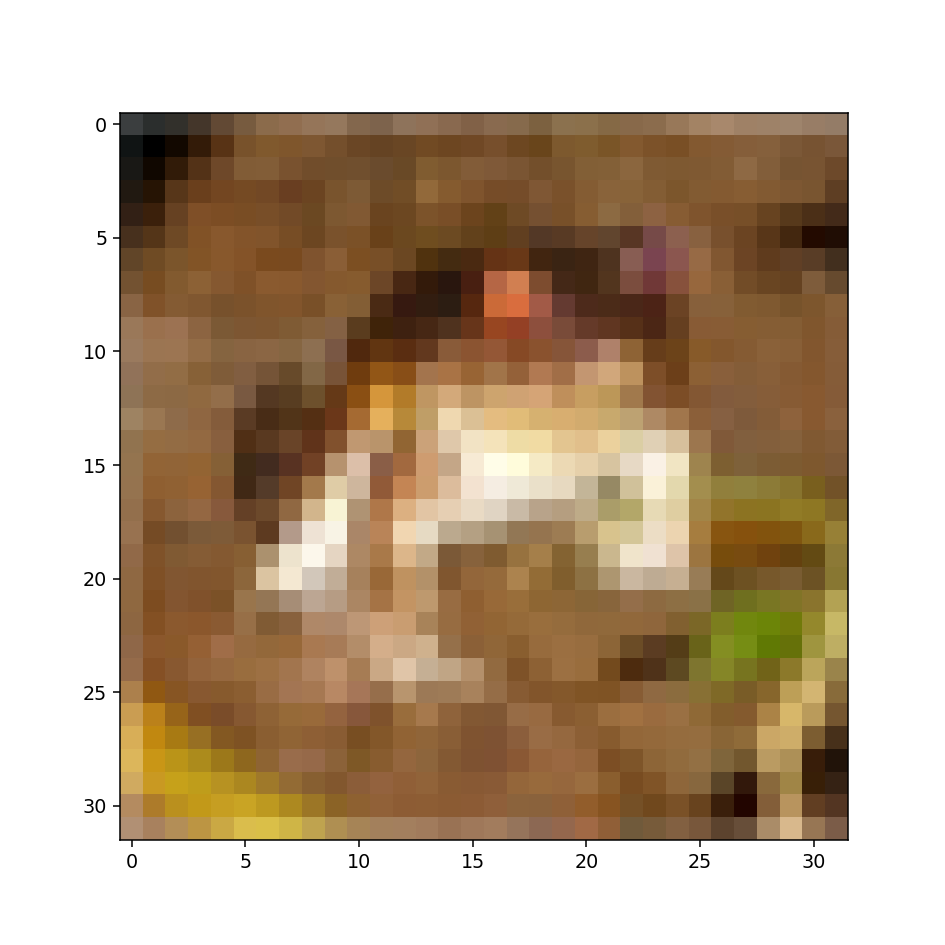

[6]


In [4]:
fig, ax = plt.subplots(figsize=(5,5))
i = 0
print(y_train[i])
plt.imshow(x_train[i])

## Task 2 - Normalize the image data
Notes:
- Each image consists of 3 matrices of 32 x 32 pixels. The matrices correspond to the red, green, blue colors. They contain values in the range (0-255) but neural networks work better with inputs in the range (0-1) so we need to normalize the image data.

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Task 3 - Define the model
Notes:
- Define a convolutional neural network using the Conv2D and MaxPooling2D layers from Keras

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

## Task 4 - Compile the model


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Task 5 - Fit the model

In [9]:
history = model.fit(x_train, y_train, epochs=10, 
          validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 26s 18ms/step - loss: 1.8176 - accuracy: 0.3300 - val_loss: 1.3158 - val_accuracy: 0.5292
Epoch 2/10
1407/1407 [==============================] - 26s 19ms/step - loss: 1.2595 - accuracy: 0.5505 - val_loss: 1.1070 - val_accuracy: 0.6080
Epoch 3/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.0860 - accuracy: 0.6138 - val_loss: 1.0638 - val_accuracy: 0.6304
Epoch 4/10
1407/1407 [==============================] - 30s 21ms/step - loss: 0.9644 - accuracy: 0.6600 - val_loss: 1.0052 - val_accuracy: 0.6510
Epoch 5/10
1407/1407 [==============================] - 29s 21ms/step - loss: 0.8934 - accuracy: 0.6853 - val_loss: 0.9138 - val_accuracy: 0.6796
Epoch 6/10
1407/1407 [==============================] - 31s 22ms/step - loss: 0.8222 - accuracy: 0.7125 - val_loss: 0.9355 - val_accuracy: 0.6842
Epoch 7/10
1407/1407 [==============================] - 33s 24ms/step - loss: 0.7696 - accuracy: 0.7289 - val_loss: 0.9366 -

## Task 6 - Evaluate the model
Notes:
- Calculate the accuracy on the test data.
- Visualize the evolution of training accuracy and validation accuracy throughout training.

In [10]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuray on the test data: {acc}")

313/313 [==============================] - 2s 7ms/step - loss: 0.8988 - accuracy: 0.7019
Accuray on the test data: 0.7019000053405762


<IPython.core.display.Javascript object>


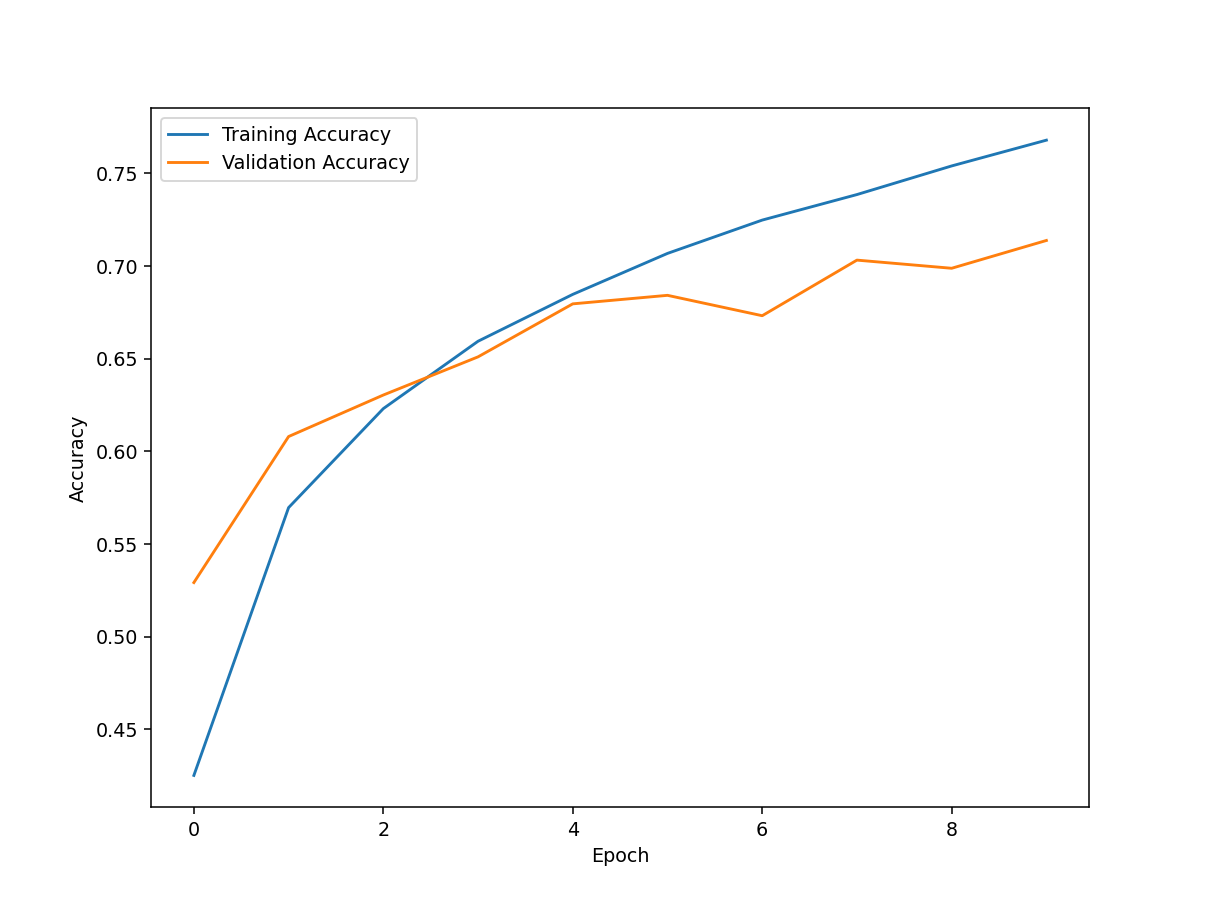

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()